# SVI & COVID - CONCLUSIONS

## About the Project
In 2011 The CDC created the social vulnerability index (SVI).  The SVI is a scale that predicts the vulnerability of a population in the event of an emergency or natural disaster. COVID is the first global pandemic since the development of this measure. We evaluated the association between SVI score and COVID case count between San Antonio and Dallas, Texas.  Using modeling, we were able to identify localized community-specific and highly vulnerable subgroups.  It was observed that the most vulnerable subgroups in San Antonio included persons over 25 years of age with no high school diploma, minority status (non-white), institutional group homes, and those who are generally unemployed.  In Dallas, these groups focused on minority populations, those over 25 years of age with no high school diploma, and individuals that are identified as having limited English proficiency (LEP).  While SVI shared a strong correlation (.55) with COVID case count per 100k in San Antonio, this correlation was not observed in Dallas (.19).  This finding suggests that resources would be well allocated in San Antonio using the SVI index, but in Dallas, that correlation does not hold. We hope that our work helps to better inform our local government about specific sub-populations were aid allocation should be prioritized.
  
### Goals

*Goal # 1* - Evaluate the association between SVI score and COVID case count in San Antonio and Dallas, Texas.

*Goal # 2* - Evaluate the correlation between raw SVI score and case count per 100k.

*Goal # 3* - Compare and contrast the patterns observed between SVI score and COVID case count. 

*Goal # 4* - Predict local communities most at risk for COVID infection using SVI score.

*Goal # 5* - To identify subgroups inside identified communities that need particular attention or focused support.

### Background
The SVI (Social Vulnerability Index) was developed to help city governments and first responders predict areas that are particularly vulnerable in emergencies to prioritize resources to help regions at high risk (CDC's Social Vulnerability Index, 2020). The CDC's Social Vulnerability Index (CDC SVI) uses 15 U.S. census variables to classify census tracts with a composite score between 0 and 1 (lower scores = less vulnerability, higher score = greater vulnerability. This score is calculated by first ranking every census tract, in every country, in every state, in the United States. Those ranked tracks are then broken up into four themes (socioeconomic status, household composition, disability, minority status and language, household type, and transportation) and reclassified.  This overall score is then tallied by summing the themed percentiles and ranked between 0 and 1.  

While SVI was designed to help city governments respond to emergencies, the systems' efficacy has never been tested in response to a global pandemic. COVID-19 is a disease caused by a new coronavirus called SARS-CoV-2. WHO first learned of this new virus on 31 December 2019, following a report of a cluster of cases of 'viral pneumonia' in Wuhan, People's Republic of China. (World Health Organization, 2020). As of 9 December 2020, more than 68.4 million cases have been confirmed, with more than 1.56 million deaths attributed to COVID-19. 

Separated by 274 miles San Antonio and Dallas are two cities that share both comparable population sizes and SVI scores. Cities will be evaluated separately and then together for comparison.  

### Initial Thoughts & Hypotheses

1. Is the average number of COVID cases per 100k is the same across CDC SVI Range Categories?

2. Is there a correlation between raw_svi and the number of cases per 100k?

3. Is SVI a useful feature for predicting the number of cases per 100k?

4. Are the individual components of SVI better at predicting COVID cases, then the rank score?

5. Are the features identified in modeling consistent across communities (similar size and SVI score)?

### Work Plan

**Data Collection** 
- What data, if we had it, would solve the problem right away?
    - Cases count per 100K by census tract with SVI metrics nationally would be ideal
- What data do we have access to?
    - Have SVI from CDC by census track
    - Have Bexar county case count per 100K by zip code for single date 12/8/20
    - Collected median case count by zip code from Dallas dashboard on 12/8/20
- What additional data would be good to have?
    - be great to have more data by zip code instead of only county level
- What data would be impossible to collect?
    - due to privacy/panic concerns case data at the census tract level is not being published for open access
- What are the best proxies you can find for unavailable or impossible data?
    - find a way to translate from census tract to zip code
- What are the legal or ethical issues you might run into if you were to try to collect all of the types of data you would like to work with?
    - considered web scraping for zip code level data where specific information is not available
    - likely better to hard code existing data that is publicly available

**Machine Learning Model**
- What ML paradigm are you working in? (Classification, Regression, Clustering, etc)
    - Regression - target continuous variable cases per 100k
    - Classification - redefine target variable into 4 ranks/classes
- What models are commonly used in this task?
    - Linear Regression, LassoLars, Polynomial Features, Tweedie Regressor, etc.
    - Random Forest, Decision Tree, K Nearest Neighbors (KNN), etc.
* What other solutions are being tried in this field?
    - Did not see other research related to SVI as predictor for pandemic specifically
    - Index is used commonly for Hurricanes
* What special considerations need to be taken when dealing with these models? (i.e., imbalanced classes, text preprocessing, data leakage, etc)
    - possibly imbalanced classes in classification modeling, will need to verify distribution
* How will you know that your models work?
    - Establish a Baseline for each type of model 
    - Regression: will predict the mean value and calculate the MAE (Mean Absolute Error)
    - Regression: compare MAE of model vs baseline, model works is it has lower MAE than baseline
    - Classification: predict the most common rank for all observations and take the percentage that are correct
    - Classification: if the model accuracy is better than the Baseline the model works


### Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import wrangle
import explore
import model_MAE


![Prepare](https://i.pinimg.com/564x/4b/a8/7f/4ba87f73e9018ba611b1f9b11895eb20.jpg)

### Acquire
We acquired SVI data from the CDC's website and downloaded COVID data for San Antonio and Dallas from the cities' respective COVID data web portals. We developed programmatic solutions to translate federal FIPS codes into discernible local Zip Codes to merge the data.  Using the HUD crosswalk we found the Zip Code that accounted for the highest percentage of addresses within the tract and assigned that as the tract's sole Zip Code. This allowed us to merge the tables by matching them to a tract. The ratio of addresses for the census tract was then used to calculate cases per 100K measure for each tract.

### Wrangle
Twenty-nine features were selected and renamed for clarity to prepare the data for exploration. Observations associated with military bases were removed from the data frame. Binning the raw SVI score created a bin_svi column and a rank_svi column. The bin_svi column returns a label (low, low-mod, mod-high, high) in relation to the raw_svi score, while the rank_svi column is a numeric representation of SVI (1 representing a high score, four representing a low score). Prepared data was split into train and test for later modeling with cross-validation.  Numeric columns were scaled using sklearn's MinMaxScaler.  Six data frames were returned at the end of wrangle, including *train_explore* for exploration and individual scaled data frames for modeling  *X_train_scaled, y_train, X_test_scaled, y_test*.

# Individual City Analysis

- Examine Bexar county and Dallas county individually through the Acquire, Prepare, Explore, and Modeling stages
- Click on the city skyline to go to the notebook for that city

**San Antonio**     
[![San_Antonio_skyline](https://st.depositphotos.com/1231639/2885/v/600/depositphotos_28856081-stock-illustration-san-antonio-city-skyline-silhouette.jpg)](https://github.com/SVI-Capstone/svi_capstone/blob/main/mvp-sa.ipynb)

**Dallas**     
[![Dallas_skyline](https://lh3.googleusercontent.com/proxy/-SPZlwiqCzl4wiU6SCsLHh8FNTuAC0_R_S7wQAWQhD38WlASRZFZni5rUnVroxdNG5XcDloF06XhENCd-TCh8Tpgsz2InUyZUSNChtnhTUYD2ehaKW2ce1dIk1kfhEwNwHm7-CCOIgIFaDqoJVuQ_vJ1IrcgPol-)](https://github.com/SVI-Capstone/svi_capstone/blob/main/mvp-dallas.ipynb)

# Explore Comparisons and Conclusions

Exploration focused on answering questions regarding the relationship between the CDC's range category SVI score and cases of COVID-19 per 100k.

**Hypothesis Testing**     
Question One: Is there a correlation between the CDC's Range Category SVI Score and COVID-19 Infection Cases per 100k Individuals?
We first visualized this relationship then conducted statistical testing to validate this observation. Due to the difference in variance in the data we performed a non-parametric ANOVA test (Kruskal). The confidence interval was set at 99% and returned a p-value less than alpha, requiring us to reject the null hypothesis and accept the alternate hypothesis that the average number of COVID-19 cases per 100k is significantly different across all CDC SVI range categories.

Question Two: Is there a correlation between raw_svi and cases per 100k?
This testing was performed using Pearson's correlation coefficient test at a confidence interval of 99%, and returned an r-value (correlation coefficient) of .55 for San Antonio and .29 for Dallas. This test also returned a p-value less than alpha, allowing us to reject the null hypothesis and accept the alternate hypothesis that there * a statistically significant difference* between raw_svi and cases per 100K.

We then visualized the distribution of cases and SVI scores. When viewed with hue = svi_cat distinct boundaries were observed separating range categories. Dispersed clustering within categories was observed, with the most significant variation occurring in the 'low' SVI vulnerability category. Several observations within this category were located outside the IQR and identified as outliers. We decided to keep these outliers in the dataset for further investigation time permitting.

The relationships between the distribution of cases and the number of specific SVI flags were examined. In San Antonio, a wide distribution of flags under the 'high' vulnerability category was observed. This suggested the need to identify subgroups inside identified communities where more focused assistance or support may be needed. 

Similar trends were observed in the Dallas dataset. The most significant difference is that flags' specific distribution under the 'high' vulnerability category change.  This unique distribution of flags per city suggests that while cities may use SVI to identify vulnerable communities, they may need alternate tools to key in on particularly vulnerable subgroups. 

After it was identified that unique flags might be used to better identify groupings within the data, an exploratory clustering analysis was performed. We hoped to use clustering to generate a new feature that could then be fed into a regression model.  Raw SVI data were examined, and three columns were identified as closely related to the prediction of COVID counts per 100k.  These features were e_pov (the estimate of persons below poverty), ep_pov (the percentage of persons below poverty), and spl_theme1 (the sum of features associated with socioeconomic themes).  These features were combined into a new feature identified as poverty_cluster.  This feature, along with centroids, were added to the data frame for modeling. 

## Hypothesis Testing

### Question One: Is there a correlation between the CDC's Range Category SVI Score and COVID-19 Infection Cases per 100k Individuals?

### Question Two: Is there a correlation between raw_svi and cases per 100k?

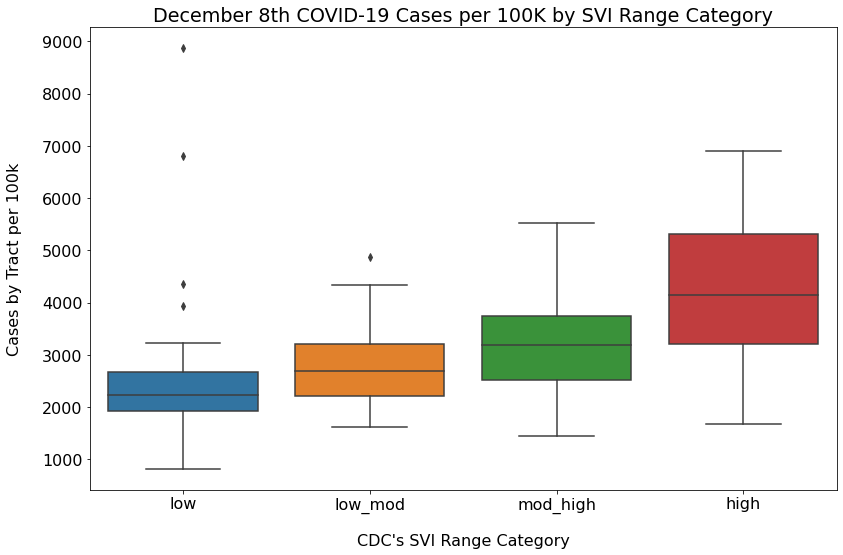

In [3]:
# leave this here but have side by side plots?
explore.sns_boxplot(train_exp)

**Takeaway:**


Summary of Hypothesis testing results here

`We can state with 99% certainty that there is a statistically significant difference between all of the CDC SVI Range Categories`

`We can state with 99% certainty that there is a statistically significant difference between raw_svi score and cases per 100K`

## Distribution Exploration

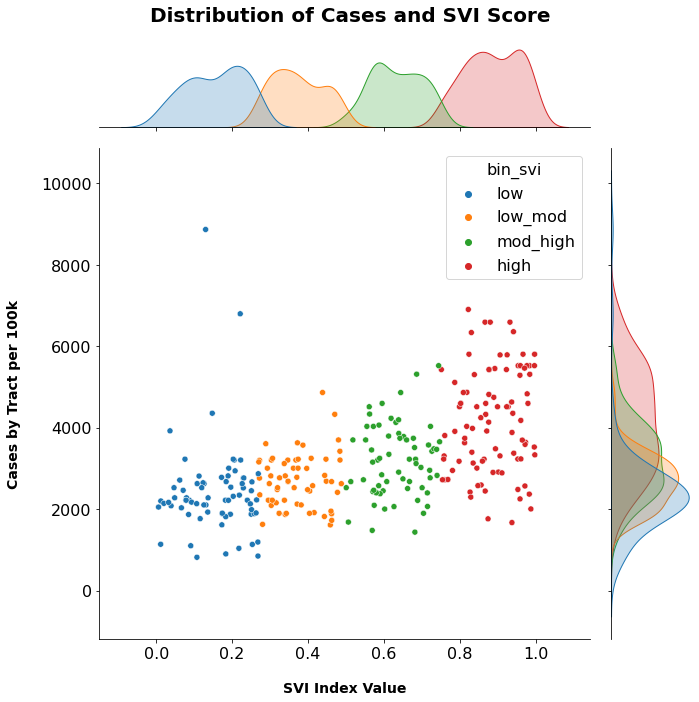

In [7]:
# replace with side by side
explore.joint_plot_index('raw_svi','tract_cases_per_100k', train_exp, 'bin_svi')

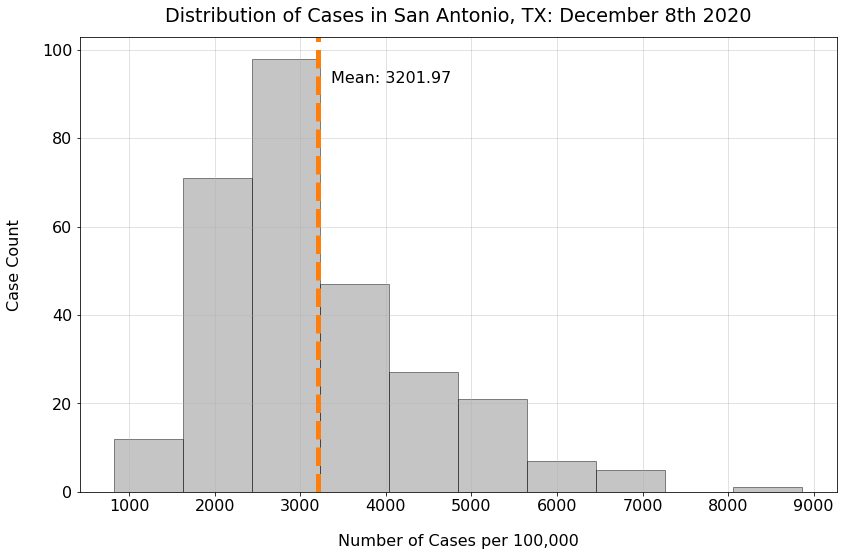

In [9]:
# replace with side by side
explore.hist_case(train_exp.tract_cases_per_100k)

In [ ]:
# skittles plots of key sub groups

# Preprocessing

**Recursive Feature Elimination (RFE)**     
RFE was used to evaluate the features and rank them prior to modeling. This list of key features determined some of the combinations of features to model on. When this alone did not produce a very accurate model further Exploration, use of KMeans clustering, and analysis of trends in the SVI found additional features to model on.

**KMeans Clustering**     
Visualization of unique flags indicated that these might better identify groupings within the data. Raw SVI data showed three flags as closely related to the prediction of COVID counts per 100k. These features were the estimate of persons below poverty (e_pov), the percentage of persons below poverty (ep_pov), and the sum of features associated with socioeconomic themes (spl_theme1). Using KMeans clustering these features were combined into a new feature identified as poverty_cluster.

**SVI Trend Feature Engineering**      



# Model Comparisons and Conclusions

Two rounds of modeling were performed during this investigation. First, a regression model that assessed SVI's impact on the prediction of COVID cases per 100k, and second a classification model that assessed SVI's impact on case rank (defined as low cases, low_mod cases, mod_high cases, or high cases).

## Regression Model

The mean value for COVID cases per 100k was identified as the baseline for modeling. We used cross-validation instead of a three-way split into train, validate, and test datasets due to the dataset's limited size. The size of the dataset is limited by the number of census tracts in each city. Linear Regression and LassoLars algorithms were used to evaluate multiple combinations of feature selection. Of these, the LassoLars had the least MAE (mean absolute error) when using all of the possible features and was run on the out of sample (test) data. The MAE of a model is the mean of the individual prediction errors' absolute values over all instances in the test set. We chose to assess model performance in terms of MAE due to its ease of interpretation. San Antonio's top-performing model was a TweedieRegressor, using Top 4 features as identified by RFE. The model demonstrated a 21% improvement over baseline. Dallas' top-performing model was also a TweedieRegressor, using Top 4 features as determined by RFE. The model showed a 2% improvement over baseline.

Classification Model

For the classification model, we ran a series of classification models using the Random Forest and KNN algorithms, which sought to use SVI components as features in the models to predict the severity of COVID cases based on our constructed rankings of point counts: Low, Low-Moderate, Moderate-High, and High bins. The mean value of the most common ranked bin was identified as the baseline for modeling. We found that our classification models' most useful features were also similar to the features we found as applicable in regression modeling. Using the Random Forest algorithm and using the top 4 RFE features, our best model yielded an accuracy result of 55%, which is an improvement over the baseline of 7% (or an increase in accuracy of 14.5%).

# Model the Data

- Baseline for modeling determined by plotting the histogram distribution of COVID-19 cases per 100k.
- The skew observed in the distribution led us to use the median for this value instead of the mean??
- Used cross validation due to limited size of dataset. Size of dataset limited by San Antonio number of census tracts.
- Three of the 4 models used all of the features in the dataset, one model used only the top4 features identified by RFE.
- Linear Regression, LassoLars, and 2 degree polynomial features used all features and a 2nd version of 2 degree polynomial was run with just the top4 features.
- Of these the LassoLars had the least MAE (mean absolute error) and was run on out of sample data (test).
- This model had nearly identical MAE when run on out of sample data, only a 0.7 difference in MAE.
- Overall this is a 25% improvement from mean baseline MAE.

## Create Baseline

In [11]:
# What is the mean vs median of the target variable?
y_train.tract_cases_per_100k.mean(), y_train.tract_cases_per_100k.median()

(3201.968351790576, 2903.7827641596423)

In [12]:
# calculate the mean absolute error (MAE) of the baseline using mean
mean_baseMAE, basepred1 = model_MAE.get_baseline_mean(y_train)

Baseline MAE: 973.0351509141836


In [13]:
# calculate the mean absolute error (MAE) of the baseline using median
median_baseMAE, basepred2 = model_MAE.get_baseline_median(y_train)

Baseline MAE: 950.9798103241462


## Feature Ranking

- Use recursive feature elimination to evaluate features for modeling

In [14]:
rankdf = model_MAE.feature_ranking(X_train_scaled, y_train)
rankdf

,features
rank,
1,rank_svi_scaled
2,f_soci_total_scaled
3,f_pov_soci
4,f_minrty_status
5,all_flags_total_scaled
6,f_groupq_trans
7,f_age17_comp
8,f_comp_total_scaled
9,f_munit_trans


## Feature Selection

In [15]:
# only raw svi score
X_raw_svi = X_train_scaled[['raw_svi']]
# binned svi score by CDC range category = 1st ranked
X_rank_svi_only = X_train_scaled[['rank_svi_scaled']]
# top 4 ranked features
X_top4 = X_train_scaled[['rank_svi_scaled', 'f_nohsdp_soci', 'f_minrty_status', 'f_groupq_trans']]
# only the summary of the flags = 19th ranked
X_all_flags_only = X_train_scaled[['all_flags_total_scaled']]
# only summary flags, should be the same as all flags total? = 5th, 12th, 15th, 21st
X_summary_flags = X_train_scaled[['f_comp_total_scaled', 'f_soci_total_scaled', 'f_status_total_scaled', 'f_trans_total_scaled']]
# all individual flags
X_not_summary_flags = X_train_scaled[['f_nohsdp_soci', 'f_minrty_status', 'f_groupq_trans', 'f_unemp_soci', 
                                     'f_disabl_comp', 'f_noveh_trans', 'f_mobile_trans', 'f_age65_comp', 
                                     'f_age17_comp', 'f_pov_soci', 'f_limeng_status', 'f_crowd_trans', 
                                      'f_pci_soci', 'f_sngpnt_comp', 'f_munit_trans']]

## Build and Train Model

- Linear Regression, Polynomial Features, and Tweedie Regressor will be run with various combinations of features
- LassoLars will be run only with all of the features because feature evaluation is a component of the model

In [16]:
# create variables for loop
df2test = [X_rank_svi_only, X_top4, X_all_flags_only, X_summary_flags, X_not_summary_flags, X_train_scaled, X_raw_svi]
target = y_train

# Linear Regression Models
lm_MAE_list = []
for df in df2test:
    lm_MAE = model_MAE.linear_reg_train(df, target)
    lm_MAE_list.append(lm_MAE)

# Polynomial Features 2 degree
pf2_MAE_list = []
for df in df2test:
    pf2_MAE = model_MAE.polynomial2(df, target)
    pf2_MAE_list.append(pf2_MAE)

# Tweedie power=0, alpha=.5
tweedie05 = []
for df in df2test:
    tw_MAE = model_MAE.tweedie05(df, target)
    tweedie05.append(tw_MAE)


In [17]:
# LassoLars Models
lars_MAE = model_MAE.lasso_lars(X_train_scaled, target)

## Interpret the Model

https://i.pinimg.com/564x/be/39/dc/be39dcb169c9dac1f8bf2e5516d22112.jpg

In [18]:
# create dataframe for results of all train models
df_list = ['rank_svi_only', 'top4', 'total_all_flags_only', 'summary_flags', 'not_summary_flags', 'all_features', 'raw_svi_only']

results = pd.DataFrame(df_list, columns=['Features'])
results['LinearRegression_MAE'] = lm_MAE_list
results['Tweedie05_MAE'] = tweedie05
results['PolynomialFeatures2_MAE'] = pf2_MAE_list
results['LassoLars_MAE'] = lars_MAE
results['Base_mean_MAE'] = mean_baseMAE
results['Base_median_MAE'] = median_baseMAE
results.sort_values('PolynomialFeatures2_MAE')

,Features,LinearRegression_MAE,Tweedie05_MAE,PolynomialFeatures2_MAE,LassoLars_MAE,Base_mean_MAE,Base_median_MAE
5,all_features,694.319979,821.826107,416.712011,697.418073,973.035151,950.97981
4,not_summary_flags,768.309031,890.061139,523.157408,697.418073,973.035151,950.97981
1,top4,733.964872,872.729805,715.532379,697.418073,973.035151,950.97981
6,raw_svi_only,776.969617,924.491852,767.016031,697.418073,973.035151,950.97981
0,rank_svi_only,775.678114,900.500732,772.144027,697.418073,973.035151,950.97981
3,summary_flags,830.585295,944.466544,780.583376,697.418073,973.035151,950.97981
2,total_all_flags_only,865.391283,958.467458,850.094118,697.418073,973.035151,950.97981


## Cross Validation Modeling

- performed on top 4 models from initial modeling
- normally would start with this step as it encompasses both Train and Validate stages
    - LassoLars
    - LR all feature
    - PF2 all features
    - PF2 top5

In [19]:
from numpy import mean
from numpy import std, absolute
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

In [20]:
# LassoLars
# create loocv procedure
cvLL = LeaveOneOut()
# create model
modelLL = LassoLars(alpha=1)
# evaluate model
scoresLL = cross_val_score(modelLL, X_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=cvLL, n_jobs=-1)
# force positive
scoresLL = absolute(scoresLL)
# report performance
print('MAE: %.3f (%.3f)' % (mean(scoresLL), std(scoresLL)))

MAE: 745.523 (707.596)


In [21]:
# Linear Regression - all features
# create loocv procedure
cvLR = LeaveOneOut()
# create model
modelLR = LinearRegression()
# evaluate model
scoresLR = cross_val_score(modelLR, X_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=cvLR, n_jobs=-1)
# force positive
scoresLR = absolute(scoresLR)
# report performance
print('MAE: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))

MAE: 753.715 (722.317)


In [22]:
# Polynomial Features 2 degrees - all features
# create loocv procedure
cvPF1 = LeaveOneOut()

# create PF object
pf1 = PolynomialFeatures(degree=2)
# Fit and Transform model to get a new set of features...which are the original features squared
X_train_squared1 = pf1.fit_transform(X_train_scaled)

# create model
modelPF1 = LinearRegression(normalize=True)
# evaluate model
scoresPF1 = cross_val_score(modelPF1, X_train_squared1, y_train, scoring='neg_mean_absolute_error', cv=cvPF1, n_jobs=-1)
# force positive
scoresPF1 = absolute(scoresPF1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(scoresPF1), std(scoresPF1)))

MAE: 644168580363410.125 (3241353656002645.500)


In [23]:
# Polynomial Features 2 degrees - top 5
# create loocv procedure
cvPF2 = LeaveOneOut()

# create PF object
pf2 = PolynomialFeatures(degree=2)
# Fit and Transform model to get a new set of features...which are the original features squared
X_train_squared2 = pf2.fit_transform(X_top4)

# create model
modelPF2 = LinearRegression(normalize=True)
# evaluate model
scoresPF2 = cross_val_score(modelPF2, X_train_squared2, y_train, scoring='neg_mean_absolute_error', cv=cvPF2, n_jobs=-1)
# force positive
scoresPF2 = absolute(scoresPF2)
# report performance
print('MAE: %.3f (%.3f)' % (mean(scoresPF2), std(scoresPF2)))

MAE: 763.343 (638.873)


## Test Stage

In [24]:
# fit model from cross validation to train dataset
modelLL.fit(X_train_scaled, y_train)
# use the trained dataset to predict on test
lars_test_pred = modelLL.predict(X_test_scaled)
# get the MAE of test
lars_MAE = mean_absolute_error(y_test, lars_test_pred)
print('MAE: %.3f' % lars_MAE)

MAE: 853.068


#### Report Metrics in Context
How did the model perform on the key metrics you chose to demonstrate its usefulness? What counts as good or bad performance? How well do humans perform on this task? How well would you expect to do with random dice rolls? What are the costs associated with missed predictions?

In [25]:
# 2-3 sentances about what LASSOLARS does (how it works)
# If we can get a viz on lassolars visual coeficients (use placeholder).
# Coef rankings (dataframe)
# Text clarifying all the coeficents, simple definitions of what each flag means (add those def strings to dataframe)
# Run the dallas data thru the same MVP process, and discover what the top 5 features are, and on they different than SAs?

In [26]:
# LASSOLARS Results table:
# import pandas as pd

ll_result = pd.DataFrame()
x_train_columns = X_train_scaled.columns.tolist()
ll_result['features'] = x_train_columns
ll_result['coefs'] = modelLL.coef_
ll_result['abs_coefs'] = abs(modelLL.coef_)
ll_result.sort_values(by = 'abs_coefs', ascending = False)

,features,coefs,abs_coefs
21,rank_svi_scaled,-1219.808155,1219.808155
9,f_minrty_status,771.683306,771.683306
2,f_unemp_soci,642.560628,642.560628
6,f_age17_comp,-600.677938,600.677938
15,f_groupq_trans,535.613870,535.613870
3,f_pci_soci,463.691305,463.691305
14,f_noveh_trans,-349.351340,349.351340
1,f_pov_soci,-266.441669,266.441669
5,f_age65_comp,-242.493153,242.493153
4,f_nohsdp_soci,219.578178,219.578178


#### LASSO+LARS Results:

In [27]:
# Table of top features:

ll_results_tbl = pd.Series(dict(zip(X_train_scaled.columns, modelLL.coef_.ravel()))).sort_values()
ll_results_tbl

rank_svi_scaled          -1219.808155
f_age17_comp              -600.677938
f_noveh_trans             -349.351340
f_pov_soci                -266.441669
f_age65_comp              -242.493153
f_mobile_trans             -91.040335
f_trans_total_scaled         0.000000
f_status_total_scaled        0.000000
f_comp_total_scaled          0.000000
f_soci_total_scaled          0.000000
f_crowd_trans                0.000000
raw_svi                      0.000000
all_flags_total_scaled       0.000000
f_sngpnt_comp                0.000000
f_limeng_status              0.000000
f_munit_trans              156.423956
f_disabl_comp              163.261302
f_nohsdp_soci              219.578178
f_pci_soci                 463.691305
f_groupq_trans             535.613870
f_unemp_soci               642.560628
f_minrty_status            771.683306
dtype: float64

(-1.6051837159435585, -0.0)

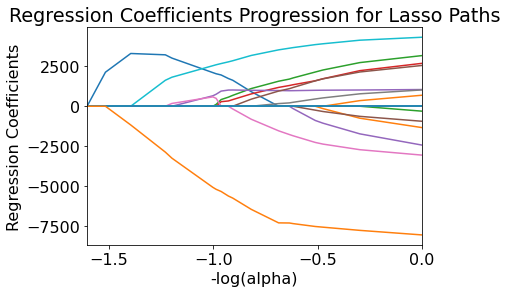

In [29]:
# import matplotlib.pyplot as plt
# import numpy as np
# %matplotlib inline

ax = plt.gca()

m_log_alphas = -np.log10(modelLL.alphas_) # alpha contains the values of alpha through the model selection process.
plt.plot(m_log_alphas, modelLL.coef_path_.T) # change in regression coefficient
np.shape(modelLL.coef_path_), np.shape(m_log_alphas)

# plt.axvline(-np.log10(modelLL.alphas_), linestyle='--', color='k',
#             label='alpha CV')

plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')
# Add legend

ax.set_xlim(m_log_alphas.min(), m_log_alphas.max())

#### Strengths and Weaknesses

Once you've gone through your iteration cycles and are finished with this version of the model, or this particular project, provide an assessment of what types of observations are handled well by your model, and what circumstances seem to give it trouble. This will point you and others towards more questions for future projects.

#### Inspect Errors

Look at some of the observations with missed predictions. (Do this in your validation set, never look at individual records in your test set!) Are there common patterns among the observations with bad results? Do you have data that you can include in your model that will capture these patterns or is this a task that will need another research project to solve?

This is your last step in the iteration cycle; if you can't find anything else you can work on here with your present data, project scope, and deadlines, then it's time to wrap things up.

# Next Steps: What Can We Do Now?

Reporting a model's results is good, and is the main objective of any data science project. But a project is one thing, a career is another. A question is one thing, but science is another. If you've carried out your research with a mindset of curiosity and creativity, then by now you should have plenty more, and much better informed, questions about this topic than what you started with.

So in addition to reporting on the question you investigated and the answers you found, think of the needs of your team, your users, and your peers in the industry, and make some recommendations that answer these two questions:

What are some unanswered questions in my project where more information (additional data sources, deeper understanding, other models or tools) might help improve these results?
What are other needs or problems where my model or my approach may be useful?

 ## additional models to try
- random forest regressor
- decission tree regressor
- support vector regressor
- multiple linear regressor

https://github.com/CSolitaire/machine-learning-course/tree/master/Machine%20Learning%20Toolkit/Regression%20Templates

## Is San Antonio different from other cities?

- Dallas?
- Pittsburgh?
- Phoenix?
- ??
- ??

## Feature Engineering

- SVI trend for the county
    - is rising? is declining? 
    - delta of SVI change year over year?
    - std dev of SVI?
